# **Project Name**    - Retail Sales Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Md Ismail Quraishi

# **Project Summary -**

write summary here 500-600 words

# **GitHub Link -**

https://github.com/mdismailquraishicse/capstone_project_3_regression

# **Problem Statement**

I have two dataset for this project 'Rossmann Stores Data.csv' and 'store.csv'. 'Rossmann Stores Data.csv' has 1017209 rows and 9 columns and 'store.csv' has 1115 rows and 10 columns. I have to do data analysis first for both the datasets and then merge the data after merging the data my task is to apply machine learning regression algorithm to predict the salling price.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from numpy import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Loading file(Rossmann Stores Data.csv)
# path = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Capstone Project/Regression/'
path = 'E:/Data Science/amlabetter/Capstone Projects/REGRESSION/'
f_names = np.array(['Rossmann Stores Data.csv','store.csv'])
rossmann_df = pd.read_csv(path+f_names[0])
store_df = pd.read_csv(path+f_names[1])

### Dataset First View

In [3]:
# First view for rossmann_df
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
# First view for store_df
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [5]:
# Rows and column counts for  rossmann_df
rossmann_df.shape

(1017209, 9)

In [6]:
# Rows and column counts for  store_df
store_df.shape

(1115, 10)

### Dataset Information

In [7]:
# rossmann_df info
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
# store_df info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [9]:
# Duplicate values for rossmann_df
rossmann_df.duplicated().value_counts()

False    1017209
dtype: int64

There is no duplicate value in rossmann_df

In [10]:
# Duplicate values for store_df
store_df.duplicated().value_counts()

False    1115
dtype: int64

There is no duplicate value in store_df

#### Missing Values/Null Values

In [11]:
# function to calculate the number of null values
def null_calculator(df):
  result = {}
  for col in df.columns:
    result[col] = len(df[df[col].isna() == True])
  return result

In [12]:
# Null value count in rossmann_df
null_calculator(rossmann_df)

{'Store': 0,
 'DayOfWeek': 0,
 'Date': 0,
 'Sales': 0,
 'Customers': 0,
 'Open': 0,
 'Promo': 0,
 'StateHoliday': 0,
 'SchoolHoliday': 0}

In [13]:
# Null value count in store_df
null_calculator(store_df)

{'Store': 0,
 'StoreType': 0,
 'Assortment': 0,
 'CompetitionDistance': 3,
 'CompetitionOpenSinceMonth': 354,
 'CompetitionOpenSinceYear': 354,
 'Promo2': 0,
 'Promo2SinceWeek': 544,
 'Promo2SinceYear': 544,
 'PromoInterval': 544}

<AxesSubplot:>

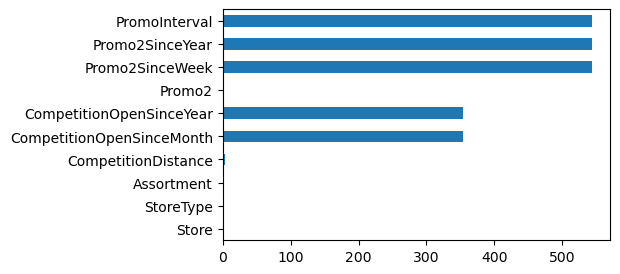

In [14]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (5,3)
pd.Series(null_calculator(store_df)).plot.barh()

### What did you know about your dataset?

I am provided with two datasets for this project 1. rossmann_df 2. store_df.

rossmann_df : It has 1017209 observations and 9 features without and duplicate and null values. Column names for the dataset are :
    <ol><li> Store
        <li>DayOfWeek
        <li>Date
        <li>Sales
        <li>Customers
        <li>Open
        <li>Promo
        <li>StateHoliday
        <li>SchoolHoliday

store_df : It has 1115 observations and 10 features without duplicate values but there are some null values. Column names and null values for each column are given below :
    <ol><li> Store
        <li>StoreType
        <li>Assortment
        <li>CompetitionDistance : 3 null values
        <li>CompetitionOpenSinceMonth : 354 null values
        <li>CompetitionOpenSinceYear : 354 null values
        <li>Promo2
        <li>Promo2SinceWeek : 544 null values
        <li>Promo2SinceYear : 544 null values
        <li>PromoInterval : 544 null values

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns for rossmann_df
rossmann_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [16]:
# Dataset Describe for rossmann_df
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
# Dataset Columns for store_df
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [18]:
# Dataset Describe for store_df
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000



### Variables Description 

answer

### Check Unique Values for each variable.

#### Unique values for rossmann_df

In [19]:
# Check Unique Values for each variable.
print(f" Number of unique values in Store is : {len(rossmann_df['Store'].unique())}")
print(f" Number of unique values in DayOfWeek is : {len(rossmann_df['DayOfWeek'].unique())}")
print(f" Number of unique values in Date is : {len(rossmann_df['Date'].unique())}")
print(f" Number of unique values in Sales is : {len(rossmann_df['Sales'].unique())}")
print(f" Number of unique values in Customers is : {len(rossmann_df['Customers'].unique())}")
print(f" Number of unique values in Open is : {len(rossmann_df['Open'].unique())}")
print(f" Number of unique values in Promo is : {len(rossmann_df['Promo'].unique())}")
print(f" Number of unique values in StateHoliday is : {len(rossmann_df['StateHoliday'].unique())}")
print(f" Number of unique values in SchoolHoliday is : {len(rossmann_df['SchoolHoliday'].unique())}")

 Number of unique values in Store is : 1115
 Number of unique values in DayOfWeek is : 7
 Number of unique values in Date is : 942
 Number of unique values in Sales is : 21734
 Number of unique values in Customers is : 4086
 Number of unique values in Open is : 2
 Number of unique values in Promo is : 2
 Number of unique values in StateHoliday is : 5
 Number of unique values in SchoolHoliday is : 2


In [20]:
print(f" Unique values in DayOfWeek are : {rossmann_df['DayOfWeek'].unique()}")
print(f" Unique values in Open are : {rossmann_df['Open'].unique()}")
print(f" Unique values in Promo are : {rossmann_df['Promo'].unique()}")
print(f" Unique values in StateHoliday are : {rossmann_df['StateHoliday'].unique()}")
print(f" Unique values in SchoolHoliday are : {rossmann_df['SchoolHoliday'].unique()}")

 Unique values in DayOfWeek are : [5 4 3 2 1 7 6]
 Unique values in Open are : [1 0]
 Unique values in Promo are : [1 0]
 Unique values in StateHoliday are : ['0' 'a' 'b' 'c' 0]
 Unique values in SchoolHoliday are : [1 0]


## 3. ***Data Wrangling***

### Data wrangling for  rossmann_df

In [21]:
# approximately 17% observations are zero
print(f"Percentage of data when shops were closed : {round(len(rossmann_df[rossmann_df['Open'] == 0])/len(rossmann_df),4)*100}.")

# Dropping the data when shops were closed.
rossmann_df = rossmann_df[rossmann_df['Open'] == 1]

Percentage of data when shops were closed : 16.99.


In [22]:
# Econding StateHoliday
# sum : '0'>0>a>b>c
# mean: b>c>a>'0'>0
print(f"Different catagories for StateHoliday : {rossmann_df.groupby(['StateHoliday'])['Sales'].mean()}")
# function for encoding the column 'StateHoliday'
def State_holiday_encoder(col):
    if col == 'c':
        return 4
    elif col == 'b':
        return 5
    elif col == 'a':
        return 3
    elif col == '0':
        return 2
    elif col == 0:
        return 1
    else:
        print('invalid')
        
# applying the  above function
rossmann_df['StateHoliday'] = rossmann_df['StateHoliday'].apply(State_holiday_encoder)

Different catagories for StateHoliday : StateHoliday
0    6701.492117
0    6992.158856
a    8487.471182
b    9887.889655
c    9743.746479
Name: Sales, dtype: float64


#### Date operations

In [23]:
# from str to date time conversion
rossmann_df['Date'] = rossmann_df['Date'].apply(lambda col: datetime.strptime(col,'%Y-%m-%d'))

In [24]:
# creating day, month, year columns
plt.rcParams['figure.figsize'] = (5,3)
rossmann_df['day'] = rossmann_df['Date'].apply(lambda d: d.day)
rossmann_df['month'] = rossmann_df['Date'].apply(lambda m: m.month)
rossmann_df['year'] = rossmann_df['Date'].apply(lambda y: y.year)

### Data wrangling for  store_df

In [25]:
# null value count
null_calculator(store_df)

{'Store': 0,
 'StoreType': 0,
 'Assortment': 0,
 'CompetitionDistance': 3,
 'CompetitionOpenSinceMonth': 354,
 'CompetitionOpenSinceYear': 354,
 'Promo2': 0,
 'Promo2SinceWeek': 544,
 'Promo2SinceYear': 544,
 'PromoInterval': 544}

In [26]:
# dropping the columns having more than 30% null values
col_tobe_dropped = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
                    'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
store_df.drop( columns=col_tobe_dropped, inplace=True)
# dropping null values less than 1%
store_df.dropna( subset=['CompetitionDistance'], inplace= True)

### What all manipulations have you done and insights you found?

#### rossmann_df :
First of all I dropped all the rows which contains only zeros in all columns then I encoded StateHoliday so that it can be feeded to ML algorithms. After that I converted Date column from string to date time type. Further I created 3 more columns day, month, year from Date column.
#### store_df :
Here I just dropped the columns which had more than 30% null values and also deleted some rows having less than 1% null values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

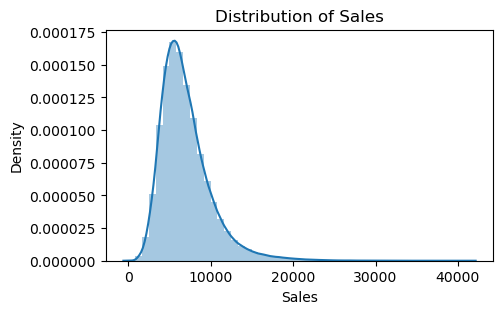

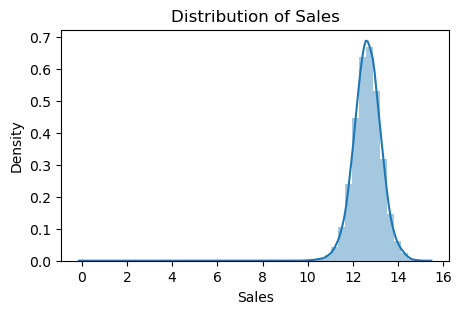

In [27]:
# Distribution plot for Sales
# Before log transformation
sns.distplot(rossmann_df['Sales'])
plt.title('Distribution of Sales')
plt.show()
print('\n')
# After log transformation
sns.distplot(np.log2(rossmann_df['Sales']+1))
plt.title('Distribution of Sales')
plt.show()

##### 1. Why did you pick the specific chart?

I picked that chart to see how the Target column is distributed.

##### 2. What is/are the insight(s) found from the chart?

Answer : From that  chart I found that the Sales column was very close to normal distribution but after log transformation I found that the distribution became more closer to Normal distribution.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer : Since the column is normally distributed so it will be very helpfull when ML algorithm will be applied, it will give good accuracy.

#### Chart - 2

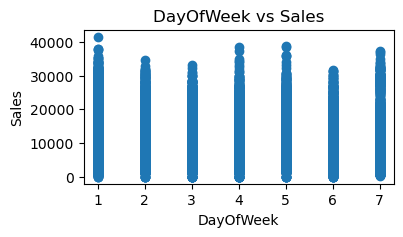

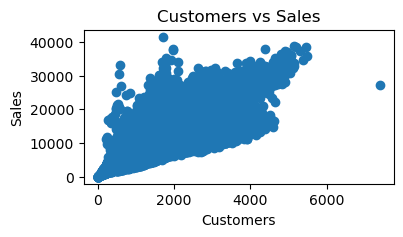

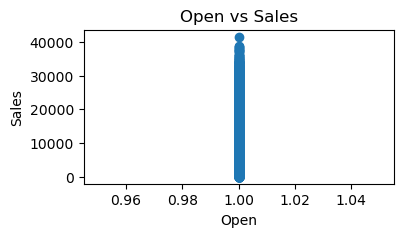

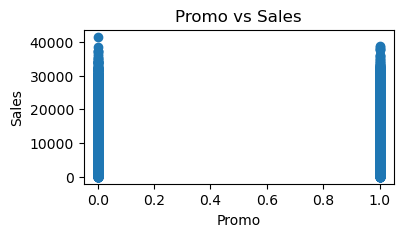

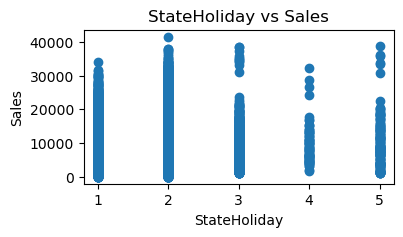

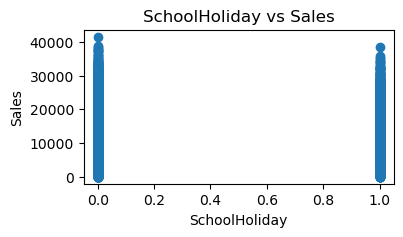

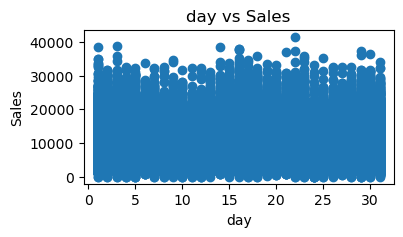

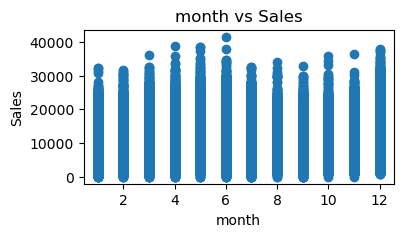

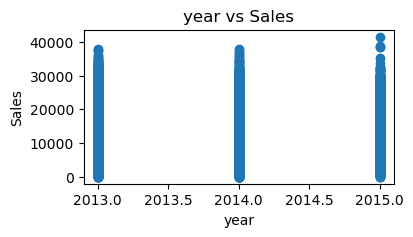

In [28]:
# Scatter plots Sales vs All Numerical columns
plt.rcParams['figure.figsize'] = (4,2)
for col in rossmann_df.describe():
    if (col == 'Sales') | (col == 'Store'):
        pass
    else:
        plt.scatter(rossmann_df[col],rossmann_df['Sales'])
        plt.title(col+' vs Sales')
        plt.xlabel(col)
        plt.ylabel('Sales')
        plt.show()

##### 1. Why did you pick the specific chart?

Answer :
    I picked these chart to see what all columns are linearly correlated with Sales column. Because for Linear regression we need columns to be linearly correlated with target column.

##### 2. What is/are the insight(s) found from the chart?

Answer : I found that only the  column Customer is linearly correlated with Sales rest of them are not linear to Sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the chart helped me to find that Customer column is very important feature for this business.<br>
There I did not see any negative growth to the business.

#### Chart - 3

Text(0, 0.5, 'Sales')

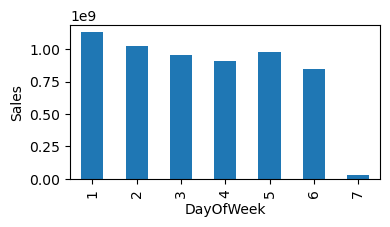

In [29]:
# Sales from day 1 to day 7
plt.rcParams['figure.figsize'] = (4,2)
rossmann_df.groupby(['DayOfWeek'])['Sales'].sum().plot.bar()
plt.ylabel('Sales')

##### 1. Why did you pick the specific chart?

Answer : I picked this chart to see what are the Sales for different days.

##### 2. What is/are the insight(s) found from the chart?

Answer : I fount that the Sale is gradually decreasing from day 1 to day 7.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. On day 7 I found that Salling is least I think it is because the shops remains closed on Sunday.<br> To earn more profit we should open the shop everyday.Yes. On day 7 I found that Salling is least I think it is because the shops remains closed on Sunday.<br> To earn more profit we should open the shop everyday.

#### Chart - 4

Text(0, 0.5, 'Sales')

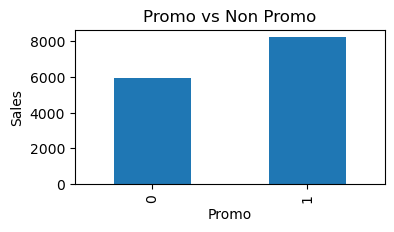

In [30]:
# Sales comparison for promotional and non promotional
rossmann_df.groupby(['Promo'])['Sales'].mean().plot.bar()
plt.title('Promo vs Non Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')

##### 1. Why did you pick the specific chart?

Answer : To see the effect of Promo on Sales.

##### 2. What is/are the insight(s) found from the chart?

Answer : I found that promo has higher sales than non promo.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer : Yes the insights help creating a positive business impact.<br> There is some negative insight when it is a non promo to avoid this negative impact we should avoid non promo.

#### Chart - 5

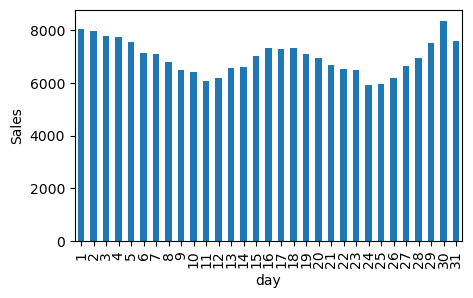

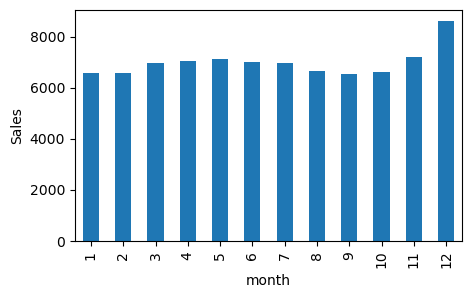

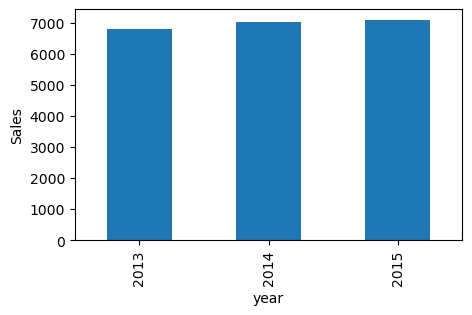

In [31]:
# looking for the patterns in a specific day, month, year
plt.rcParams['figure.figsize'] = (5,3)
rossmann_df.groupby(['day'])['Sales'].mean().plot.bar()
plt.ylabel('Sales')
plt.show()
rossmann_df.groupby(['month'])['Sales'].mean().plot.bar()
plt.ylabel('Sales')
plt.show()
rossmann_df.groupby(['year'])['Sales'].mean().plot.bar()
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Answer : To see sales for each day, each month and each year

##### 2. What is/are the insight(s) found from the chart?

Answer : I did not find any helpful information from these three charts.